In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.drop(columns=["customerID"], inplace=True)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)

label_encoder = LabelEncoder()
data["Churn"] = label_encoder.fit_transform(data["Churn"])

X = data.drop(columns=["Churn"])
y = data["Churn"]

X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
X_encoded[numeric_features] = scaler.fit_transform(X_encoded[numeric_features])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

C:\Users\dhaks\AppData\Local\Temp\ipykernel_24476\1567353111.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)


In [3]:
def build_model_with_dropout():
    model = Sequential([
        Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def build_model_without_dropout():
    model = Sequential([
        Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [4]:
model_no_dropout = build_model_without_dropout()
history_no_dropout = model_no_dropout.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=0
)

model_with_dropout = build_model_with_dropout()
history_with_dropout = model_with_dropout.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=0
)

c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
test_loss_no_dropout, test_accuracy_no_dropout = model_no_dropout.evaluate(X_test, y_test, verbose=0)
test_loss_with_dropout, test_accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)

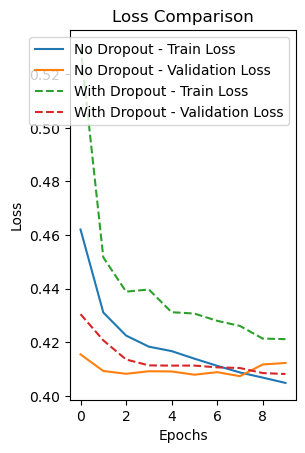

In [6]:
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['loss'], label='No Dropout - Train Loss')
plt.plot(history_no_dropout.history['val_loss'], label='No Dropout - Validation Loss')
plt.plot(history_with_dropout.history['loss'], label='With Dropout - Train Loss', linestyle='--')
plt.plot(history_with_dropout.history['val_loss'], label='With Dropout - Validation Loss', linestyle='--')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

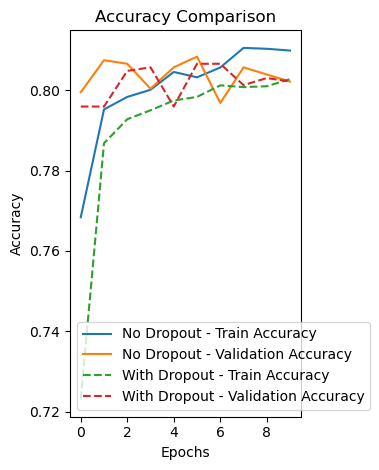

In [7]:
plt.subplot(1, 2, 2)
plt.plot(history_no_dropout.history['accuracy'], label='No Dropout - Train Accuracy')
plt.plot(history_no_dropout.history['val_accuracy'], label='No Dropout - Validation Accuracy')
plt.plot(history_with_dropout.history['accuracy'], label='With Dropout - Train Accuracy', linestyle='--')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout - Validation Accuracy', linestyle='--')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

In [8]:
comparison_table = pd.DataFrame({
    "Model": ["No Dropout", "With Dropout"],
    "Test Loss": [test_loss_no_dropout, test_loss_with_dropout],
    "Test Accuracy": [test_accuracy_no_dropout, test_accuracy_with_dropout]
})
print(comparison_table)

          Model  Test Loss  Test Accuracy
0    No Dropout   0.400299       0.816182
1  With Dropout   0.400309       0.806955


In [9]:
"""
Dropout regularization reduces overfitting by randomly deactivating neurons during training, which forces the network 
to learn more robust features. In the plots, the model with dropout typically shows smaller gaps between training 
and validation loss/accuracy, indicating better generalization. However, dropout may slightly reduce training accuracy 
since the model has to work harder to learn patterns.
"""

'\nDropout regularization reduces overfitting by randomly deactivating neurons during training, which forces the network \nto learn more robust features. In the plots, the model with dropout typically shows smaller gaps between training \nand validation loss/accuracy, indicating better generalization. However, dropout may slightly reduce training accuracy \nsince the model has to work harder to learn patterns.\n'